# Простейшая Нейронная сеть 
Это пример пройстешей нейронной сети. На вход она получает список из n элементов и ее задача - понять, что ответ предопределяется вторым числом в данном списке (элемент с индексом 1). То есть, если на вход она получает допустим $(1, 0, 0, 1)$ она должна вывести 0, если $(1, 1, 0, 1)$ - 1.  

In [27]:
#
import numpy as np 
import matplotlib.pyplot as pt #просто для графиков

input_values = np.array([
    [0, 1, 0, 0], 
    [1, 0, 0, 1],
    [1, 1, 1, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0],
    [1, 0, 1, 0]
])

output_values = np.array([
    [1], [0], [1], [0], [0], [0]
])

In [28]:
class NeuralNetwork:
    
    
    def __init__ (self, input_values, output_values):
        self.input = input_values
        self.result = output_values
        self.weights = np.array([[round(np.random.random_sample(), 2)],
                                 [round(np.random.random_sample(), 2)],
                                 [round(np.random.random_sample(), 2)],
                                 [round(np.random.random_sample(), 2)]
        ])
        self.errors_epochs = []
        self.epochs = []
    
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_deriv(self, x): #мы будем юзать это только с уже посчитанным сигмоидом поэтому (то есть x будет уже sigmoid(self, x1))
        return (x * (1 - x)) # в общем случае Sigmoid'(x) = Sigmoid(x) * (1 - Sigmoid(x))
    
    
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.input, self.weights))
        
    
    def predict(self, input_values):
        return self.sigmoid(np.dot(input_values, self.weights))
    
    
    def back_propagation(self):
        self.error  = self.result - self.hidden
        delta = self.error * self.sigmoid_deriv(self.hidden)
        mat = np.dot(self.input.T, delta)
        self.weights += mat
    
    
    
    def train(self, epochs = 30000):
        for i in range(epochs):
            self.feed_forward()
            self.back_propagation()
            self.errors_epochs.append(np.average(abs(self.error)))
            self.epochs.append(i)
            
            
    

In [34]:
Vasya = NeuralNetwork(input_values, output_values)
Vasya.train()
print(Vasya.predict(np.array([[1, 0, 1, 0]])))
print(Vasya.predict(np.array([[1, 1, 0, 0]])))

[[0.00504022]]
[[0.99997017]]


https://www.ladbible.com/cdn-cgi/image/width=1200,quality=70,format=jpeg,fit=contain,dpr=1/https%3A%2F%2Fs3-images.ladbible.com%2Fs3%2Fcontent%2Fbd9f19995fe03288211239f5ac6e093f.png


Что ж, это довольно неплохой результат 

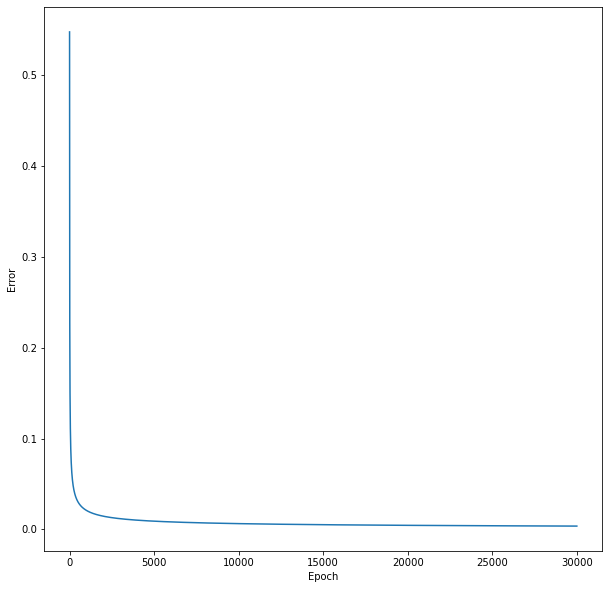

In [32]:
pt.figure(figsize=(10,10))
pt.plot(Vasya.epochs, Vasya.errors_epochs)
pt.xlabel('Epoch')
pt.ylabel('Error')
pt.show()

Ну и соответсвенно график, который показыает зависимость ошибки на нашем обучаещем сете в зависимости от эпохи. 